<a href="https://colab.research.google.com/github/wbandabarragan/nonlinear-dynamics-chaos/blob/main/unit-1/tutorials/7_Python_Classes_Modules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of Python classes

We will use Python Classes to study a basic example on dynamics in 1D. The purpose of the code is to simulate the Newtonian motion of a particle movinf at constant acceleration.

## Example: Kinematic Equations for Constant Acceleration

We start from **Newton's second law** and assume motion of a particle of mass $m$ under a constant net force $F$ along one dimension.  

$$F = ma$$

For constant $F$ (constant acceleration $a$) we have

$$a \equiv \frac{dv}{dt} = \text{constant}$$

## 1. Velocity as a function of time

We integrate acceleration with respect to time, assuming $v_0$ be the velocity at $t=0$.

$$
\frac{dv}{dt} = a \quad\Longrightarrow\quad dv = a\,dt
$$

Integrating from the initial time $0$ to time $t$:

$$
\int_{v_0}^{v(t)} dv = \int_{0}^{t} a\,dt
$$

Because $a$ is constant:

$$
v - v_0 = a t
$$

So the velocity is

$$
\boxed{v = v_0 + a t}
$$

## 2. Position as a function of time

Velocity is the time derivative of position:

$$
\frac{dx}{dt} = v = v_0 + a t
$$

Integrating from $t=0$ with $x(0)=x_0$:

$$
\int_{x_0}^{x(t)} dx = \int_{0}^{t} (v_0 + a t)\,dt
$$

Evaluating:

$$
x - x_0 = v_0 t + \tfrac{1}{2} a t^2
$$

Thus the position is

$$
\boxed{x = x_0 + v_0 t + \tfrac{1}{2} a t^2}
$$

## 3. Velocity–position relation

Using the chain rule, we have:

$$
a = \frac{dv}{dt} = \frac{dv}{dx}\frac{dx}{dt} = v\frac{dv}{dx}
$$

Separating variables and integrating:

$$
\int_{v_0}^{v} v\,dv = \int_{x_0}^{x} a\,dx
$$

$$
\frac{1}{2}\big(v^2 - v_0^2\big) = a(x - x_0)
$$

And we have the other well known kinematic relation:

$$
\boxed{v^2 = v_0^2 + 2a(x-x_0)}
$$


### 1. Creating class

In [1]:
# Import third-party libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create class
class Kinematics:
  """
  """
  # Class attributes
  author = "WEBB"
  year   = "2025"


In [3]:
# Test by creating an instance
tmp_obj = Kinematics()

print(tmp_obj.author)
print(tmp_obj.year)

WEBB
2025


### 2. Add an init function ("constructor"):

In [4]:
# Create class
class Kinematics:
  """
  """
  # Class attributes
  author = "WEBB"
  year   = "2025"

  # Constructor: init function -> initial conditions
  def __init__(self, pos = 0.0, vel = 0.0, acc = 0.0):
    """
    """
    self.xpos = pos
    self.xvel = vel
    self.xacc = acc


In [5]:
# Test by creating an instance
tmp_obj2 = Kinematics(1., 2., 0.5)

print(tmp_obj2.author)
print(tmp_obj2.year)
print(tmp_obj2.xpos)
print(tmp_obj2.xvel)
print(tmp_obj2.xacc)

WEBB
2025
1.0
2.0
0.5


### 3. Add methods

In [6]:
# Create class
class Kinematics:
  """
  """
  # Class attributes
  author = "WEBB"
  year   = "2025"

  # init function -> initial conditions
  def __init__(self, pos = 0.0, vel = 0.0, acc = 0.0):
    """
    """
    self.xpos = pos
    self.xvel = vel
    self.xacc = acc

  # Add method to print the ICs
  def print_ics(self):
    """
    """
    print("Initial position:", self.xpos)
    print("Initial velocity:", self.xvel)
    print("Initial acceleration:", self.xacc)


In [7]:
# Create new instance:

tmp_obj3 = Kinematics()

tmp_obj3.print_ics()

Initial position: 0.0
Initial velocity: 0.0
Initial acceleration: 0.0


In [8]:
# Create new instance:

tmp_obj4 = Kinematics(3., 5., -0.6)

tmp_obj4.print_ics()

Initial position: 3.0
Initial velocity: 5.0
Initial acceleration: -0.6


In [9]:
# Examples:
# np.min()
# plt.plot()

### 4. Add simulationmethods

In [10]:
# Create class
class Kinematics:
  """
  """
  # Class attributes
  author = "WEBB"
  year   = "2025"

  # init function -> initial conditions
  def __init__(self, pos = 0.0, vel = 0.0, acc = 0.0):
    """
    """
    self.xpos = pos
    self.xvel = vel
    self.xacc = acc

  # Add method to print the ICs
  def print_ics(self):
    """
    """
    print("Initial position:", self.xpos)
    print("Initial velocity:", self.xvel)
    print("Initial acceleration:", self.xacc)

  # Add dynamical method
  def calculate_dynamics(self, t):
    """
    """
    # Update the position
    self.xpos = self.xpos + self.xvel*t + 0.5*self.xacc*t**2

    # Update the velocity
    self.xvel = self.xvel + self.xacc*t

    # Return
    return self.xpos, self.xvel

In [11]:
# Create an instance
sim_1 = Kinematics(0., 0., 1.)

# Check ICs
sim_1.print_ics()
print("\n")

# Calculate the updated position and velocity
time = 10.

# Call the dynamics method
x_10, v_10 = sim_1.calculate_dynamics(time)

print("The position at t=10 is: ", x_10)
print("The velocity at t=10 is: ", v_10)

Initial position: 0.0
Initial velocity: 0.0
Initial acceleration: 1.0


The position at t=10 is:  50.0
The velocity at t=10 is:  10.0


### 5. Record the dynamical history:

In [12]:
# Time vector
t_vector = np.linspace(0., 20., 1000)
#t_vector = np.arange(0., 20.+0.002, 0.002)

# Evaluate in all times
# Empty lists to store the history
x_list = []
v_list = []

# Call the dynamics method
for j in range(len(t_vector)):
  #print(t_vector[j])
  sim_1 = Kinematics(0., 0., 1.)
  x_t, v_t = sim_1.calculate_dynamics(t_vector[j])

  x_list.append(x_t)
  v_list.append(v_t)

# Convert from lists to arrays
x_arr = np.array(x_list)
v_arr = np.array(v_list)

# Safe checks
#print(x_arr, v_arr)
#print(t_vector.shape, x_arr.shape, v_arr.shape)

### 6. Make plots of the dynamics history:

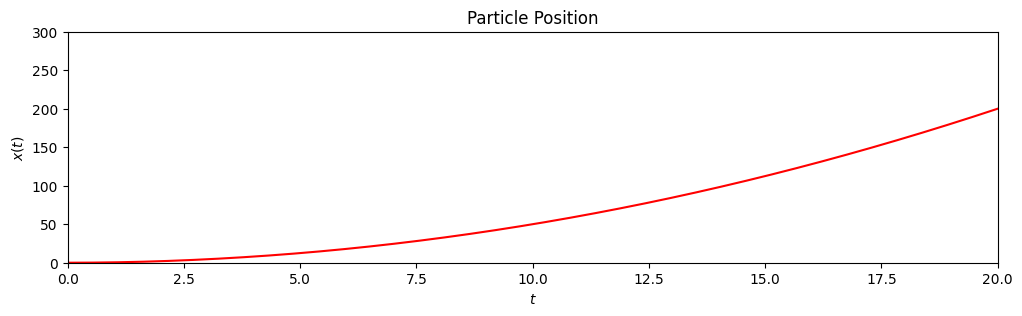

In [13]:
# Figure environment
plt.figure(figsize=(12, 3))

plt.plot(t_vector, x_arr, color = "red")

plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")

plt.title("Particle Position")

plt.xlim(t_vector[0],t_vector[-1])
plt.ylim(0., 300)

plt.show()


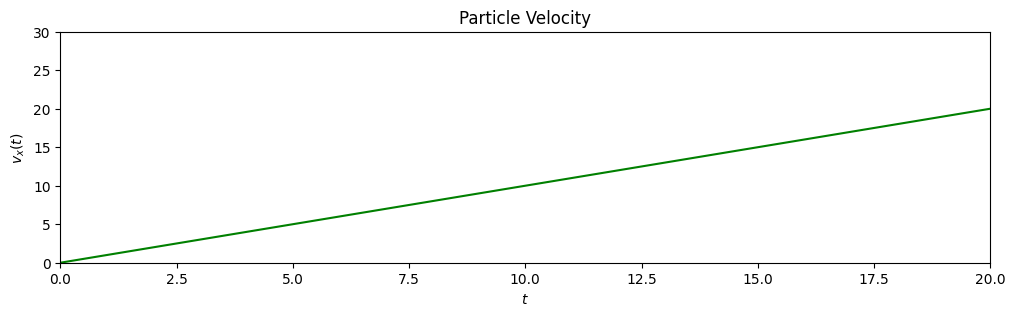

In [14]:
# Figure environment
plt.figure(figsize=(12, 3))

plt.plot(t_vector, v_arr, color = "green")

plt.xlabel(r"$t$")
plt.ylabel(r"$v_x(t)$")

plt.title("Particle Velocity")

plt.xlim(t_vector[0],t_vector[-1])
plt.ylim(0.,30)

plt.show()


### 7. Create a full routine:

```python
# Import third-party libraries
import numpy as np
import matplotlib.pyplot as plt

# Create class
class Kinematics:
  """
  """
  # Class attributes
  author = "WEBB"
  year   = "2025"

  # init function -> initial conditions
  def __init__(self, pos = 0.0, vel = 0.0, acc = 0.0):
    """
    """
    self.xpos = pos
    self.xvel = vel
    self.xacc = acc

  # Add method to print the ICs
  def print_ics(self):
    """
    """
    print("Initial position:", self.xpos)
    print("Initial velocity:", self.xvel)
    print("Initial acceleration:", self.xacc)

  # Add dynamical method
  def calculate_dynamics(self, t):
    """
    """
    # Update the position
    self.xpos = self.xpos + self.xvel*t + 0.5*self.xacc*t**2

    # Update the velocity
    self.xvel = self.xvel + self.xacc*t

    # Return
    return self.xpos, self.xvel

# Routine for using the class automously
if __name__ == "__main__":

  # Create new instance:
  tmp_obj4 = Kinematics(0., 0., 1.)
  tmp_obj4.print_ics()

  # Time vector
  t_vector = np.linspace(0., 20., 1000)
  #t_vector = np.arange(0., 20.+0.002, 0.002)

  # Evaluate in all times
  # Empty lists to store the history
  x_list = []
  v_list = []

  # Call the dynamics method
  for j in range(len(t_vector)):
    #print(t_vector[j])
    sim_1 = Kinematics(0., 0., 1.)
    x_t, v_t = sim_1.calculate_dynamics(t_vector[j])

    x_list.append(x_t)
    v_list.append(v_t)

  # Convert from lists to arrays
  x_arr = np.array(x_list)
  v_arr = np.array(v_list)

  # Figure environment
  plt.figure(figsize=(12, 3))

  plt.plot(t_vector, x_arr, color = "red")

  plt.xlabel(r"$t$")
  plt.ylabel(r"$x(t)$")

  plt.title("Particle Position")

  plt.xlim(t_vector[0],t_vector[-1])
  plt.ylim(0., 300)

  plt.savefig("./position.png")
  plt.close()

  # Figure environment
  plt.figure(figsize=(12, 3))

  plt.plot(t_vector, v_arr, color = "green")

  plt.xlabel(r"$t$")
  plt.ylabel(r"$v_x(t)$")

  plt.title("Particle Velocity")

  plt.xlim(t_vector[0],t_vector[-1])
  plt.ylim(0.,30)

  plt.savefig("./velocity.png")
  plt.close()
```